In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. LOAD DATASET
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
# 2. PRE-PROCESSING (Standardization)
# PCA is a variance-maximizing exercise; scaling ensures all features contribute equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. COMPUTE COVARIANCE MATRIX (The Quadratic Form)
# Proof of Work: S = (1/n-1) * X^T * X
cov_matrix = np.cov(X_scaled.T)
print("--- Step 1: Covariance Matrix (Symmetric) ---")
print(cov_matrix)

--- Step 1: Covariance Matrix (Symmetric) ---
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:
# 4. EIGEN-DECOMPOSITION
# Proof of Work: Solving det(S - λI) = 0
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print("\n--- Step 2: Eigenvalues (Explained Variance) ---")
print(eigen_values)


--- Step 2: Eigenvalues (Explained Variance) ---
[2.93808505 0.9201649  0.14774182 0.02085386]


In [7]:
# 5. SORTING & SELECTION
# We sort by eigenvalues to find the directions of maximum variance.
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

In [8]:
# 6. PROJECTION ONTO NEW SUBSPACE
# Projecting 4D data onto a 2D Subspace (Principal Components)
projection_matrix = eigen_vectors[:, :2]
X_pca = X_scaled.dot(projection_matrix)

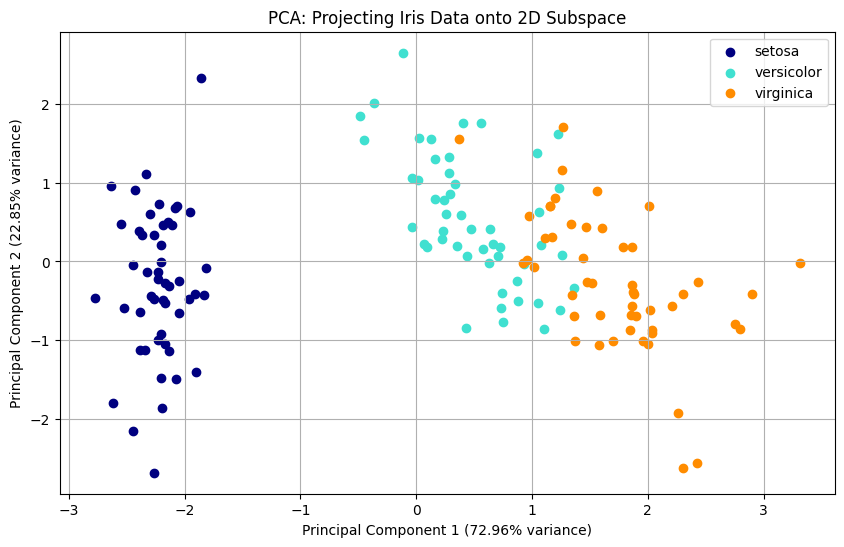

In [9]:
# 7. VISUALIZATION
plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=target_name)

plt.title('PCA: Projecting Iris Data onto 2D Subspace')
plt.xlabel(f'Principal Component 1 ({eigen_values[0]/sum(eigen_values):.2%} variance)')
plt.ylabel(f'Principal Component 2 ({eigen_values[1]/sum(eigen_values):.2%} variance)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# 8. RUBRIC CHECK: Explain why this matters
print("\n--- Rubric Verification ---")
print(f"Total Variance Captured by 2 PCs: {np.sum(eigen_values[:2])/np.sum(eigen_values):.2%}")
print("Concept: The Null Space of this projection contains the noise/redundant info.")


--- Rubric Verification ---
Total Variance Captured by 2 PCs: 95.81%
Concept: The Null Space of this projection contains the noise/redundant info.


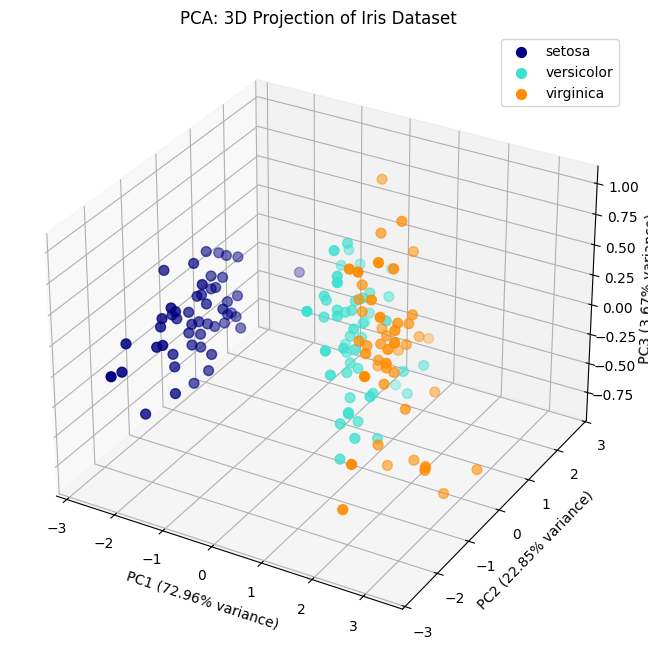

Total Variance Captured by 3 PCs: 99.48%


In [11]:
from mpl_toolkits.mplot3d import Axes3D

# 6. PROJECTION ONTO 3D SUBSPACE
# We take the top 3 eigenvectors now
projection_matrix_3d = eigen_vectors[:, :3]
X_pca_3d = X_scaled.dot(projection_matrix_3d)

# 7. 3D VISUALIZATION
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['navy', 'turquoise', 'darkorange']
for i, target_name in enumerate(iris.target_names):
    ax.scatter(X_pca_3d[y == i, 0], 
               X_pca_3d[y == i, 1], 
               X_pca_3d[y == i, 2], 
               color=colors[i], 
               label=target_name, 
               s=50)

ax.set_title('PCA: 3D Projection of Iris Dataset')
ax.set_xlabel(f'PC1 ({eigen_values[0]/sum(eigen_values):.2%} variance)')
ax.set_ylabel(f'PC2 ({eigen_values[1]/sum(eigen_values):.2%} variance)')
ax.set_zlabel(f'PC3 ({eigen_values[2]/sum(eigen_values):.2%} variance)')

ax.legend()
plt.show()

# RUBRIC CHECK: Total variance explained in 3D
total_var_3d = np.sum(eigen_values[:3])/np.sum(eigen_values)
print(f"Total Variance Captured by 3 PCs: {total_var_3d:.2%}")